![R-Kenntnis](../Pics/header.png "R-Kenntnis")

<img src="https://img.shields.io/badge/--Kenntnis-blue?style=flat-square&logo=r&logoColor=white"/><a href="https://ostfalia.de/w" target="_blank"><img src="https://img.shields.io/badge/Ostfalia-Fakultät%20W-blue?style=flat-square&logo=googlescholar&logoColor=white"/></a> <img src="https://img.shields.io/badge/Semester-WiSe2022%2F23-green?style=flat-square"/> <img src="https://img.shields.io/badge/Copyright-2020--22-orange?style=flat-square"/> <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/" target="_blank"><img src="https://img.shields.io/badge/License-by--nc--sa-red?style=flat-square"/></a> 

<div class="alert alert-block alert-info">
<img src="https://img.shields.io/badge/Information-Übung_08_LSG-blue?style=for-the-badge&logo=bookstack&logoColor=white">
    
* **Titel:** R-Kenntnis Lösung Übungen 08: Zeitreihenanalyse mit R
* **Autor:** Prof. Dr. Denis Royer
* **Datum:** 07.12.2023 (Version 3.0)
* **Zugehöriges Vorlesungsmodul:** LV11 - Zeitreihenanalyse    

</div>

# BI - R-Kenntnis Lösung Übungen 08: Zeitreihenanalyse mit R

<div class="alert alert-block alert-warning">
<b>Wichtig:</b> Bevor wir loslegen, müssen wir zunächst einmal ein paar vorbereitende Dinge erledigen:

* Die notwendigen Packages laden (bspw. `tidyverse`)
* Datensatz laden (siehe *Data/marketing.csv*)

</div>

In [2]:
# Laden der notwendigen Libraries
library(tidyverse)
library(ggplot2)
library(forecast)
library(lubridate)
library(ggfortify)
library(escapeR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'ggfortify':
  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts        

# Übungsaufgaben: Analyse von Passagierdaten

## Datensatz und Aufgabe
Der Datensatz `AirPassengers` enthält die Daten für eine Fluggesellschaft und deren monatliches Passagieraufkommen für den Zeitraum von 1949 - 1960.

In [3]:
data("AirPassengers")
# Ausgabe der Daten in einer druckfähigen Tabelle 
# mittels pander()
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

***Folgende Aufgaben:***


* Analysieren Sie die Daten und erstellen Sie eine Zeitreihenanalyse.
* Leiten Sie ein adäquates ARIMA Modell ab.
* Erstellen Sie mit Ihrem Modell eine Prognose für die Jahre 1961 - 1965.

Siehe auch folgende Links:

* <http://rstudio-pubs-static.s3.amazonaws.com/311446_08b00d63cc794e158b1f4763eb70d43a.html>
* <https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials>
* <https://blog.exxcellent.de/datenanalyse-mit-r-so-erstellen-sie-interaktive-prognoseplots>

## ![](https://img.shields.io/badge/Schritt-1-lightgrey?style=flat) Laden der Daten

![](https://img.shields.io/badge/Aufgabe-8.1-blue?style=for-the-badge&logo=r&logoColor=white)

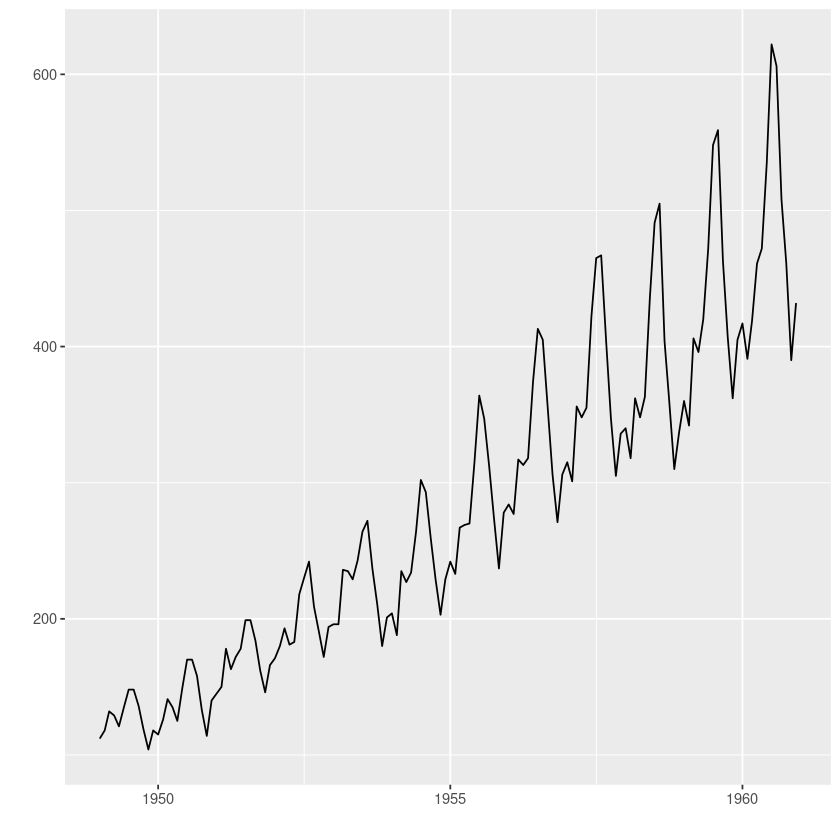

In [4]:
# Laden und plotten des Datensatzes
AirPassengers.ts <- AirPassengers
autoplot(AirPassengers.ts)

## ![](https://img.shields.io/badge/Schritt-2-lightgrey?style=flat) Identifikation von Trend- und Saison-Aspekten (Differencing)

![](https://img.shields.io/badge/Aufgabe-8.2a-blue?style=for-the-badge&logo=r&logoColor=white)

Im ersten Schritt geht es nun darum, wie viele Differencing Schritte notwendig sind.

Wir wollen eine Zeitreihe, die nach dem Differencing keine Trend- oder Saison-Aspekte enthält.

In [5]:
# Trend Differencing --> d=1
AirPassengers.ts.diff_trend <-diff(AirPassengers.ts)
# Saison Differencing d=0/D=1
AirPassengers.ts.diff_saison <- diff(AirPassengers.ts, lag = 12)
# Trend und Saison Differencing kombiniert--> d=1 / D=1
AirPassengers.ts.diff_trendsaison <- diff(diff(AirPassengers.ts, lag = 12))

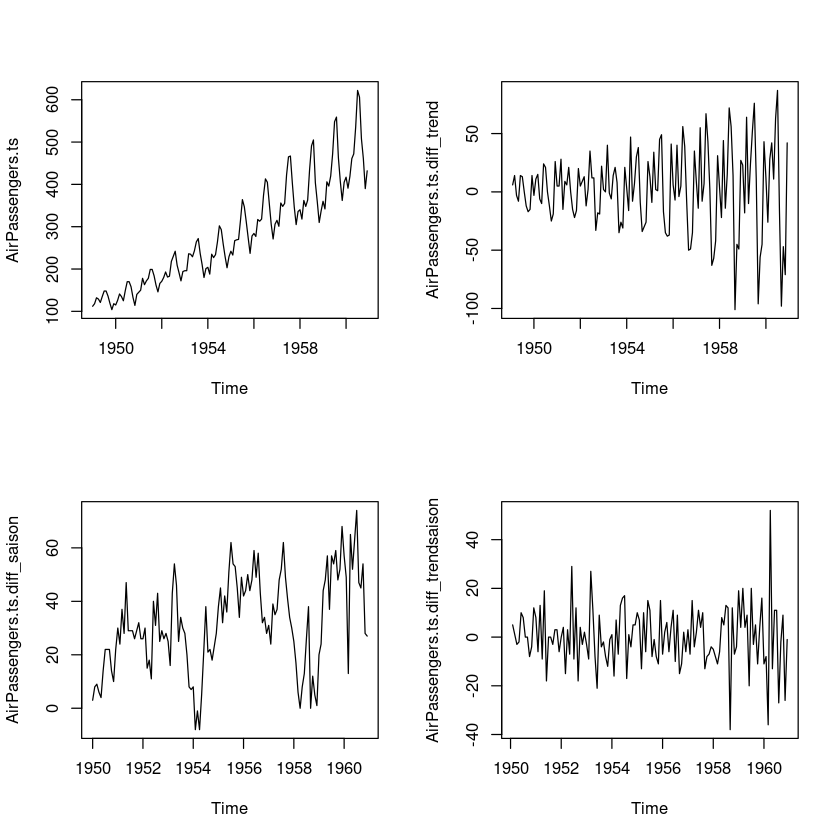

In [6]:
par(mfrow = c(2, 2))
# Plot der Zeitreihe
plot(AirPassengers.ts)
# Plot mit Differencing des Trends
plot(AirPassengers.ts.diff_trend)
# Plot mit Differencing der Saison (12)
plot(AirPassengers.ts.diff_saison)
# Kombiniertes Differencing (Trend & Saison)
plot(AirPassengers.ts.diff_trendsaison)

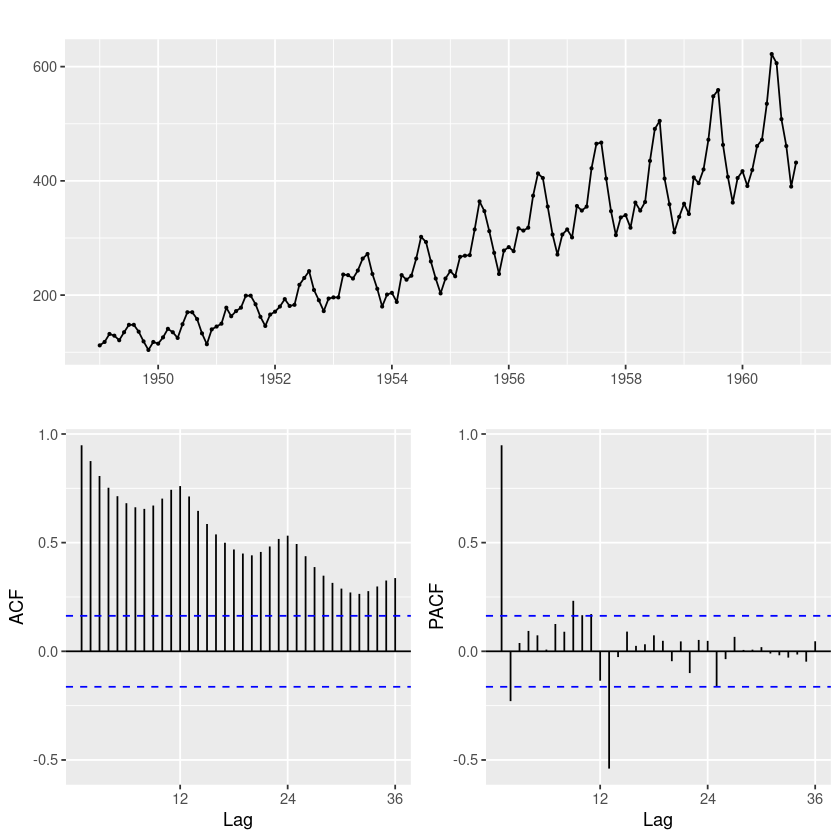

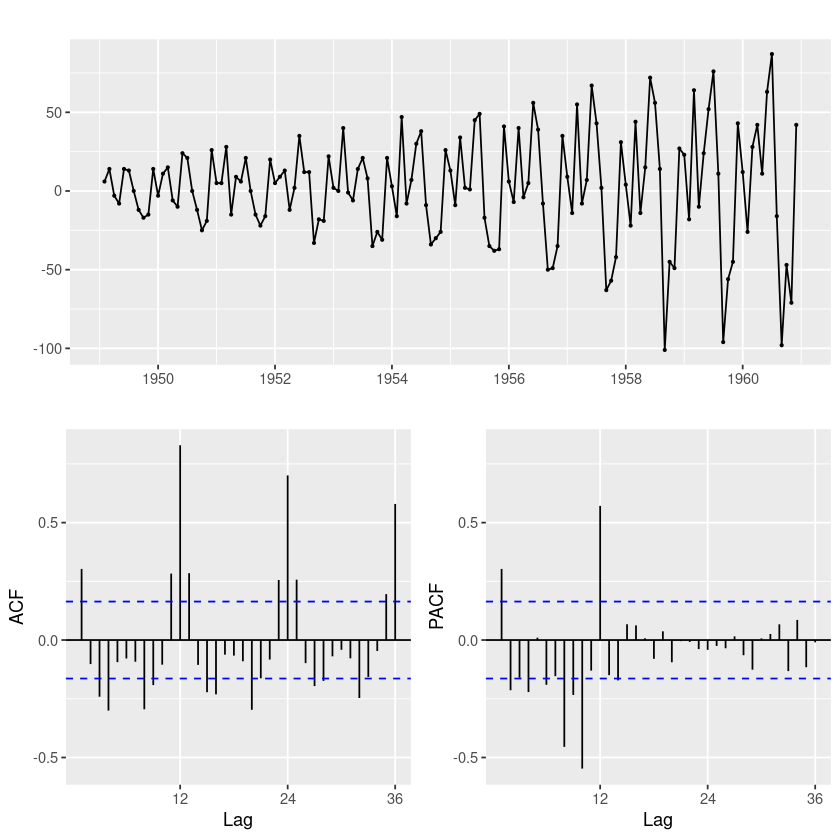

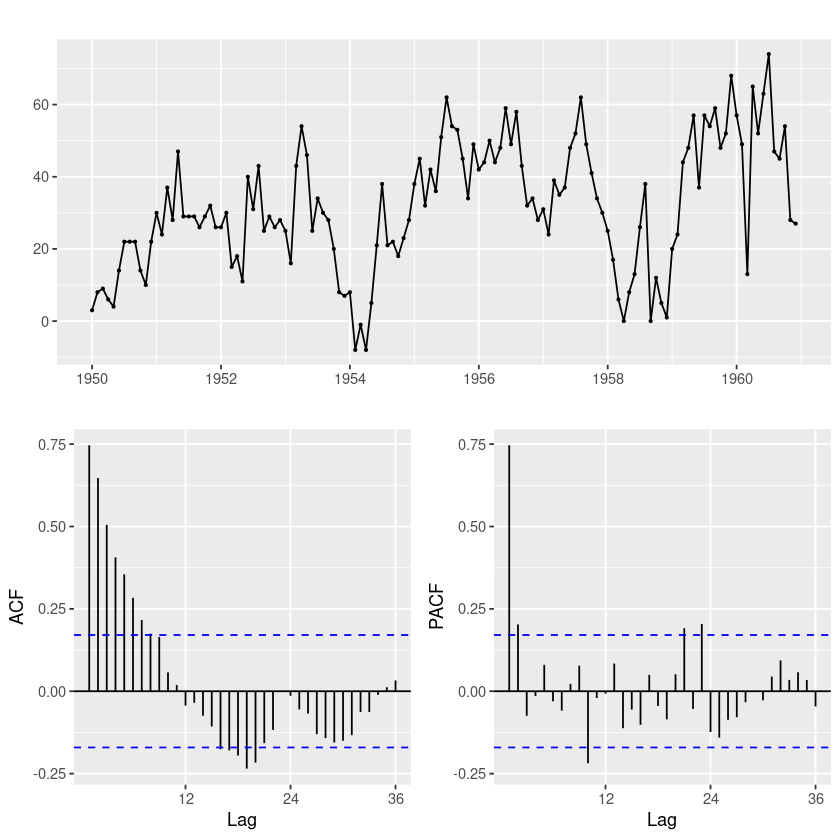

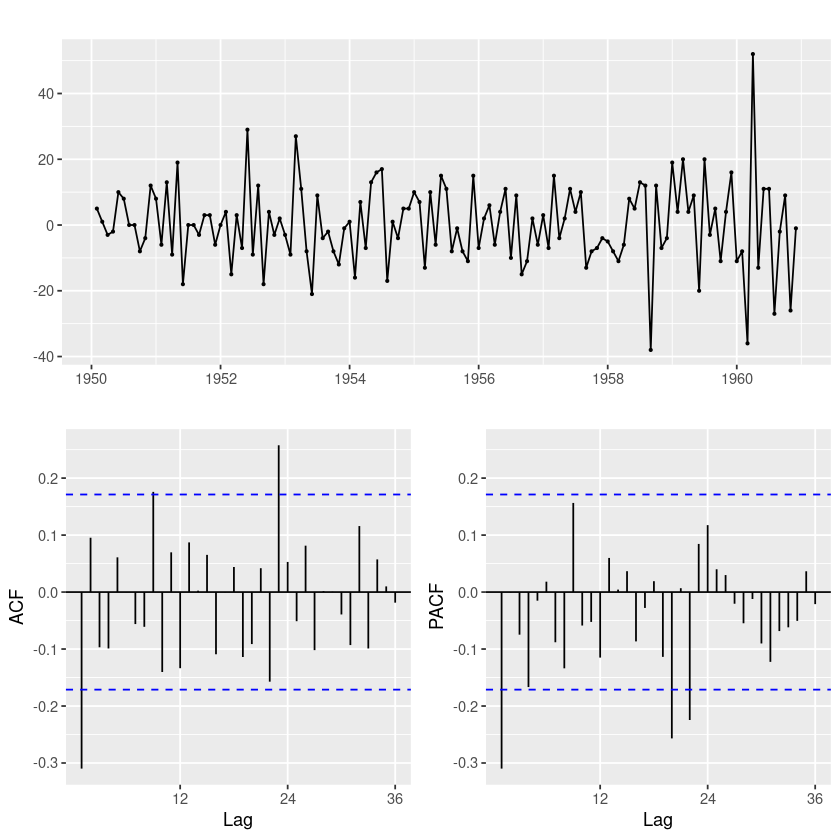

In [7]:
# mit ggtsdisplay()
ggtsdisplay(AirPassengers.ts)
ggtsdisplay(AirPassengers.ts.diff_trend)
ggtsdisplay(AirPassengers.ts.diff_saison)
ggtsdisplay(AirPassengers.ts.diff_trendsaison)

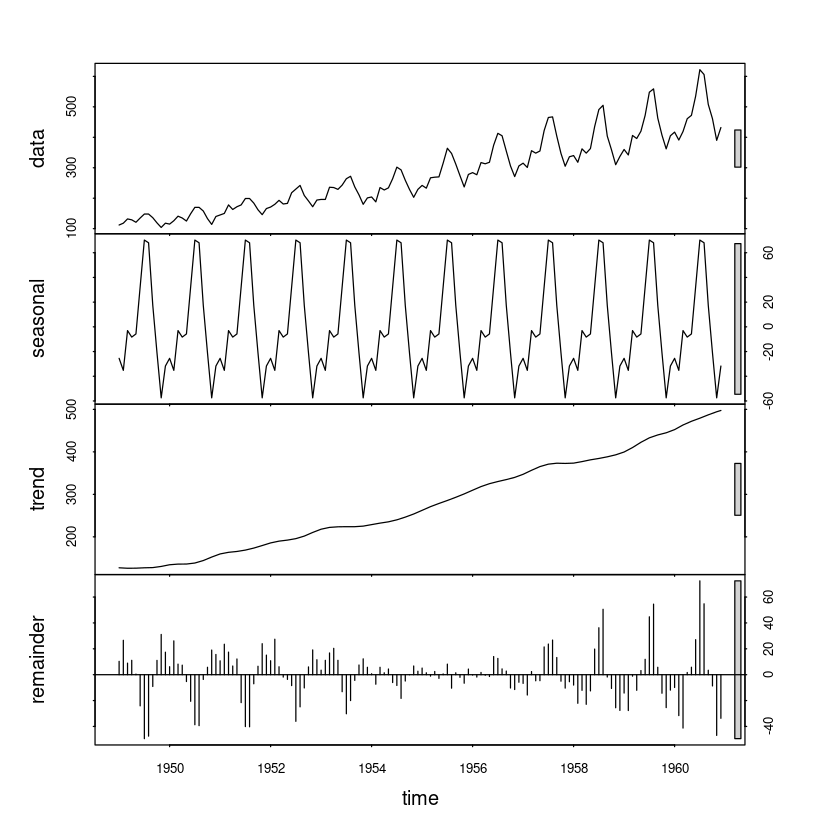

In [8]:
AirPassengers.ts.stl <- stl(AirPassengers.ts, "per")
plot(AirPassengers.ts.stl)

## ![](https://img.shields.io/badge/Schritt-3-lightgrey?style=flat) Konfiguration des Modells

![](https://img.shields.io/badge/Aufgabe-8.2b-blue?style=for-the-badge&logo=r&logoColor=white)

In [9]:
AirPassengers.fit.auto <- auto.arima(AirPassengers.ts, 
                                    trace = TRUE, 
                                    seasonal = TRUE, 
                                    ic = "aicc")

summary(AirPassengers.fit.auto)


 ARIMA(2,1,2)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,0)[12]                    : 1031.539
 ARIMA(1,1,0)(1,1,0)[12]                    : 1020.582
 ARIMA(0,1,1)(0,1,1)[12]                    : 1021.192
 ARIMA(1,1,0)(0,1,0)[12]                    : 1020.488
 ARIMA(1,1,0)(0,1,1)[12]                    : 1021.103
 ARIMA(1,1,0)(1,1,1)[12]                    : Inf
 ARIMA(2,1,0)(0,1,0)[12]                    : 1022.583
 ARIMA(1,1,1)(0,1,0)[12]                    : 1022.583
 ARIMA(0,1,1)(0,1,0)[12]                    : 1020.733
 ARIMA(2,1,1)(0,1,0)[12]                    : 1018.165
 ARIMA(2,1,1)(1,1,0)[12]                    : 1018.395
 ARIMA(2,1,1)(0,1,1)[12]                    : 1018.84
 ARIMA(2,1,1)(1,1,1)[12]                    : Inf
 ARIMA(3,1,1)(0,1,0)[12]                    : 1019.565
 ARIMA(2,1,2)(0,1,0)[12]                    : 1019.771
 ARIMA(1,1,2)(0,1,0)[12]                    : 1024.478
 ARIMA(3,1,0)(0,1,0)[12]                    : 1023.984
 ARIMA(3,1,2)(0,1,0)[12] 

Series: AirPassengers.ts 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE     MASE         ACF1
Training set 1.342299 10.84619 7.86754 0.4206976 2.800458 0.245628 -0.001248475

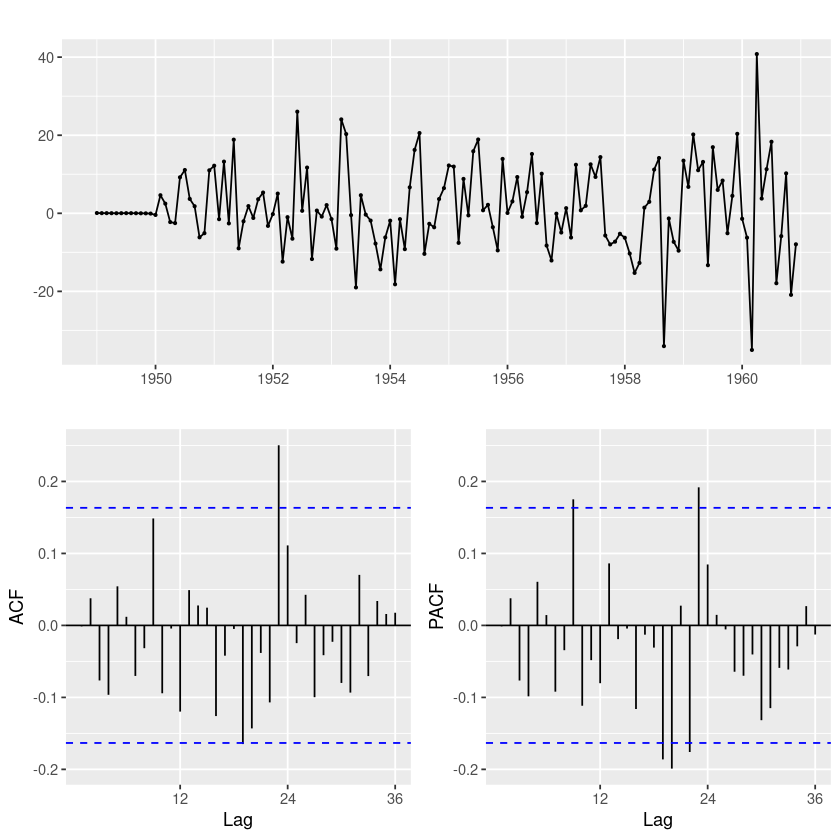

In [10]:
AirPassengers.fit.auto %>% 
  residuals() %>% 
  ggtsdisplay()

## ![](https://img.shields.io/badge/Schritt-4-lightgrey?style=flat) Überprüfung des Modells

![](https://img.shields.io/badge/Aufgabe-8.3-blue?style=for-the-badge&logo=r&logoColor=white)

Für die Analyse des Modells nutzen wir die ```ggtsdiag()``` Funktion aus der ```ggfortify``` Bibliothek.

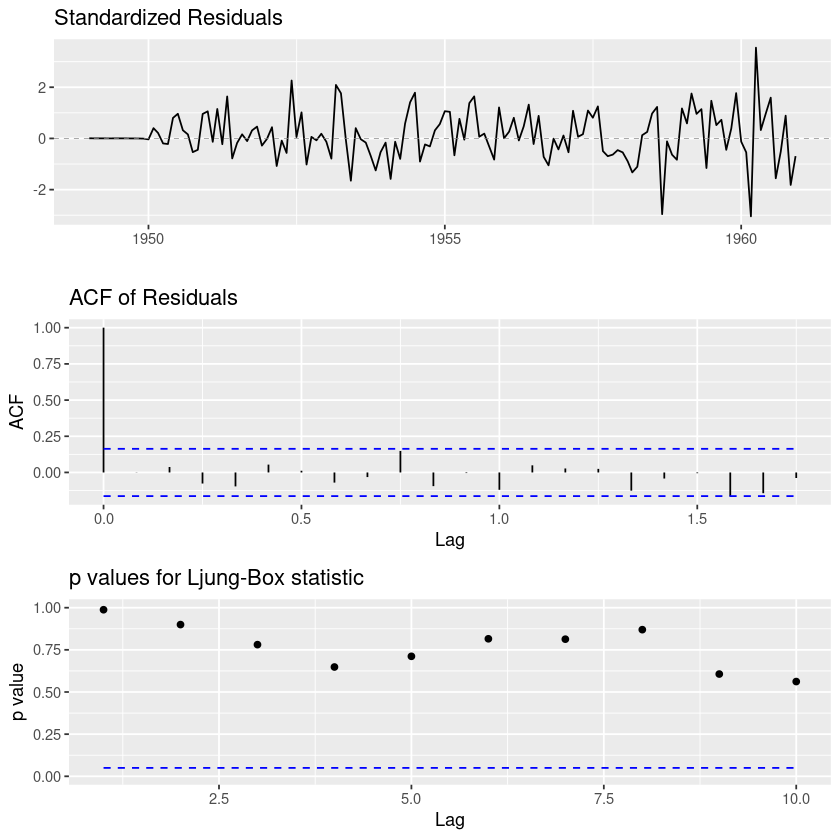

In [11]:
ggtsdiag(AirPassengers.fit.auto)

Basierend auf den Ausgaben von ```ggtsdiag()``` kann man davon ausgehen, dass das resultierende Modell eine relativ hohe Güte besitzt. Speziell die AUsgaben des Ljung-Box Test deuten darauf hin (p-Werte > 0,05).

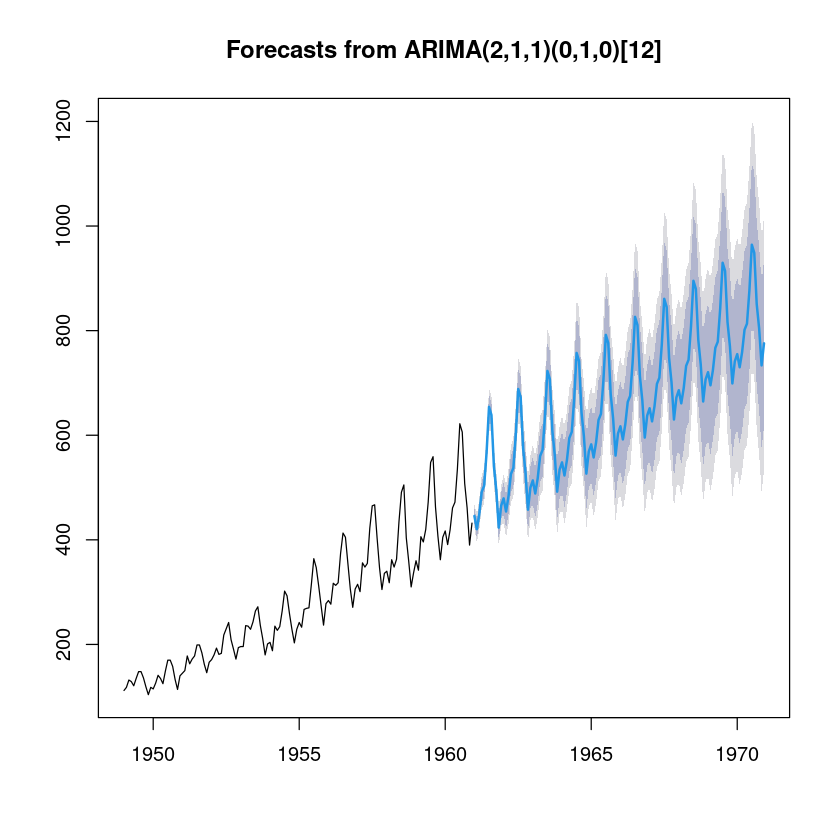

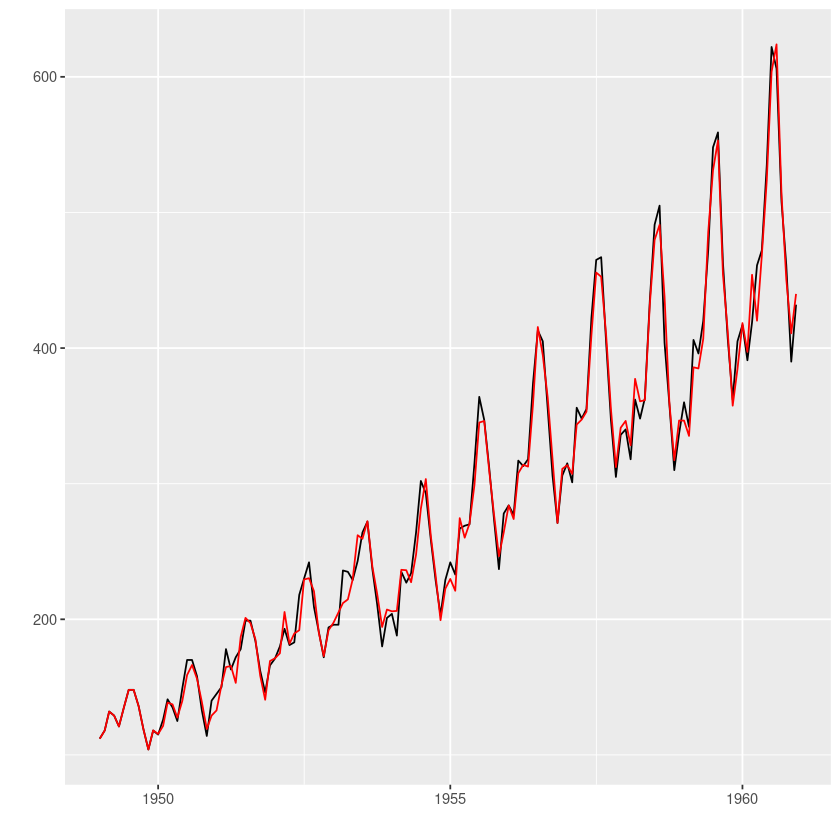

In [12]:
AirPassengers.yr_forecast2 <- forecast(AirPassengers.fit.auto, h = 10*12)
# AirPassengers.yr_forecast2
plot(AirPassengers.yr_forecast2)
autoplot(AirPassengers.fit.auto)

In [14]:
Box.test(AirPassengers.yr_forecast2, type="Ljung-Box")


	Box-Ljung test

data:  AirPassengers.yr_forecast2
X-squared = 10.607, df = 1, p-value = 0.001127


## ![](https://img.shields.io/badge/Schritt-5-lightgrey?style=flat) Vergleich des Modells und der Vorhersage mittels Testdaten

![](https://img.shields.io/badge/Aufgabe-8.4-blue?style=for-the-badge&logo=r&logoColor=white)

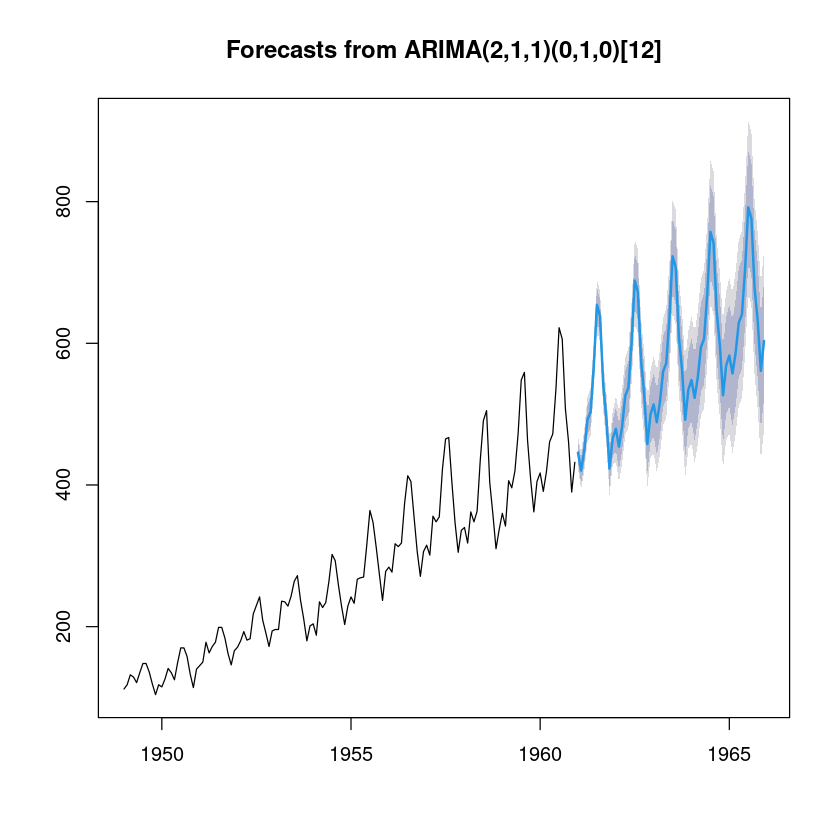

In [15]:
# Einfache Vorhersage
AirPassengers.forecast <- forecast(AirPassengers.fit.auto, h=60)
plot(AirPassengers.forecast)

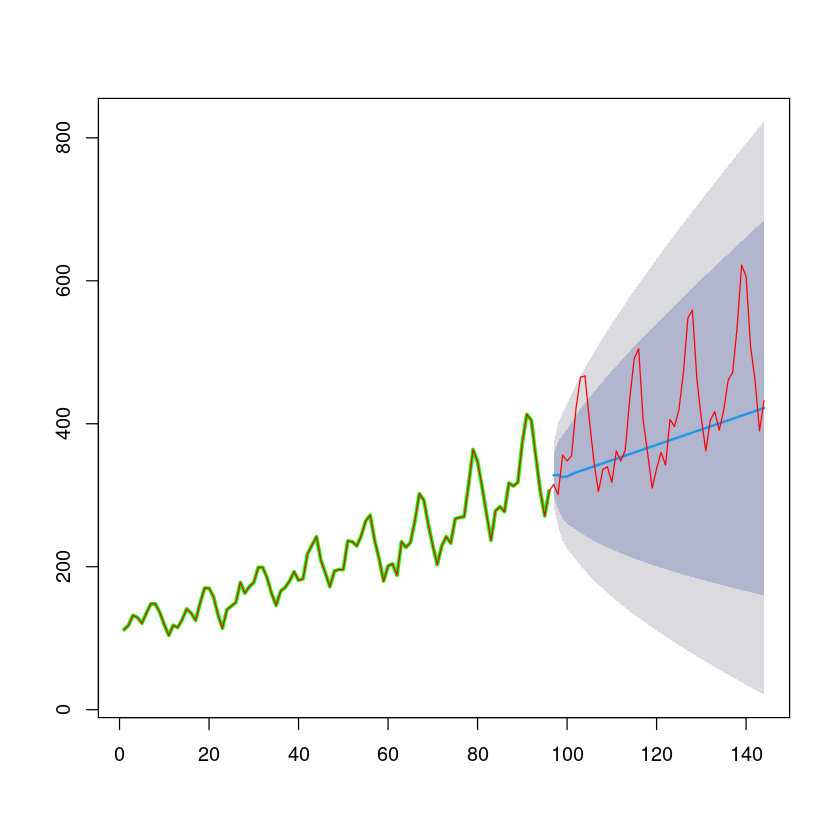

In [18]:
# Exkurs: Check des Modells
hold <- window(ts(AirPassengers.ts), start=97)

fit_no_holdout = arima(ts(AirPassengers.ts[-c(97:144)]), order=c(2,1,1), seasonal = c(0,1,0))

fcast_no_holdout <- forecast(fit_no_holdout,h=48)
plot(fcast_no_holdout, main=" ", col="green",lwd=3)
lines(ts(AirPassengers.ts),col="red")